In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [4]:
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("C:\\Users\\Sharath K M\\OneDrive\\Desktop\\Machine Learning\\housing.csv")

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.shape

(20640, 10)

In [11]:
df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [12]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [14]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [19]:
df["total_rooms"].mean()

2635.7630813953488

In [20]:
df["total_rooms"].median()

2127.0

In [21]:
df["total_rooms"].mode()

0    1527.0
Name: total_rooms, dtype: float64

In [22]:
df["total_rooms"].fillna(df["total_rooms"].median(),inplace=True)

In [23]:
df["total_rooms"].fillna(df["total_rooms"].median(),inplace=False)

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [33]:
for i in df.iloc[:2:7]:
    df[i] = pd.to_numeric(df[i], errors="coerce")  # Convert, setting non-numeric values to NaN

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.0,37.0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NaN
1,-122.0,37.0,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NaN
2,-122.0,37.0,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NaN
3,-122.0,37.0,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NaN
4,-122.0,37.0,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NaN


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.142297,2.006374,-124.0000,-121.0000,-118.0000,-118.00000,-114.0000
latitude,20640.0,35.107607,2.141580,32.0000,33.0000,34.0000,37.00000,41.0000
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
Numerical=df.select_dtypes(include=[np.number]).columns
print(Numerical)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


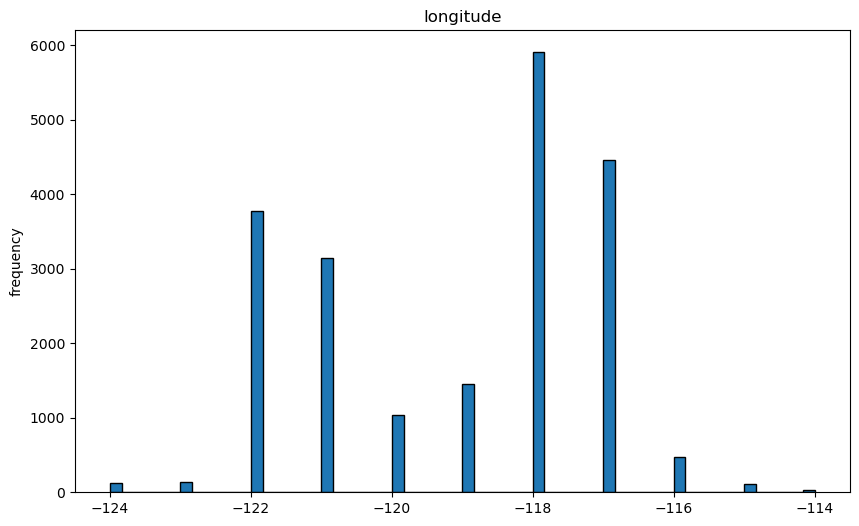

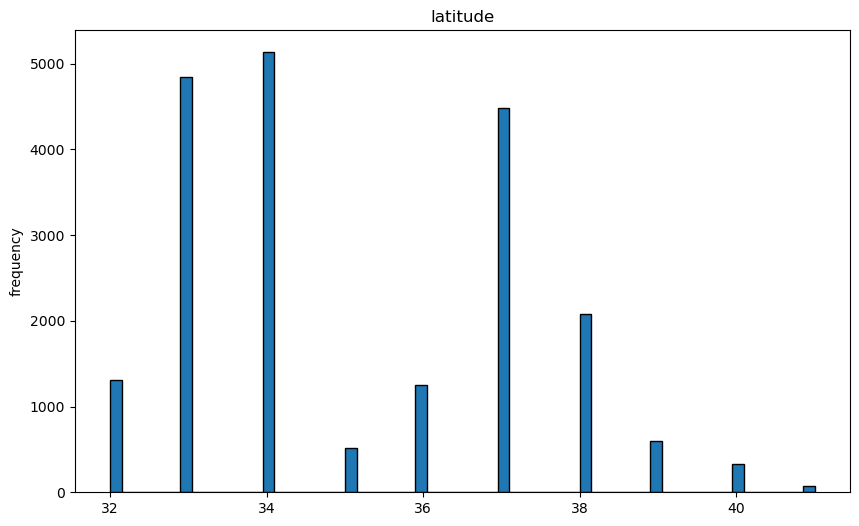

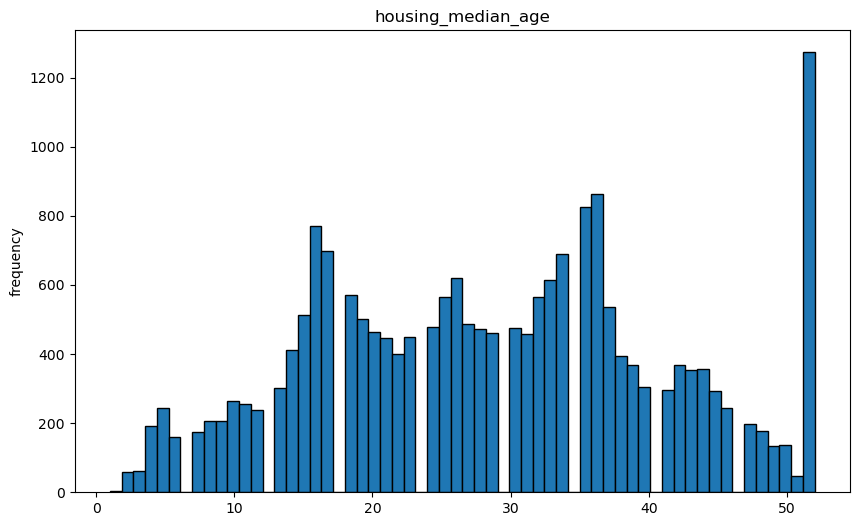

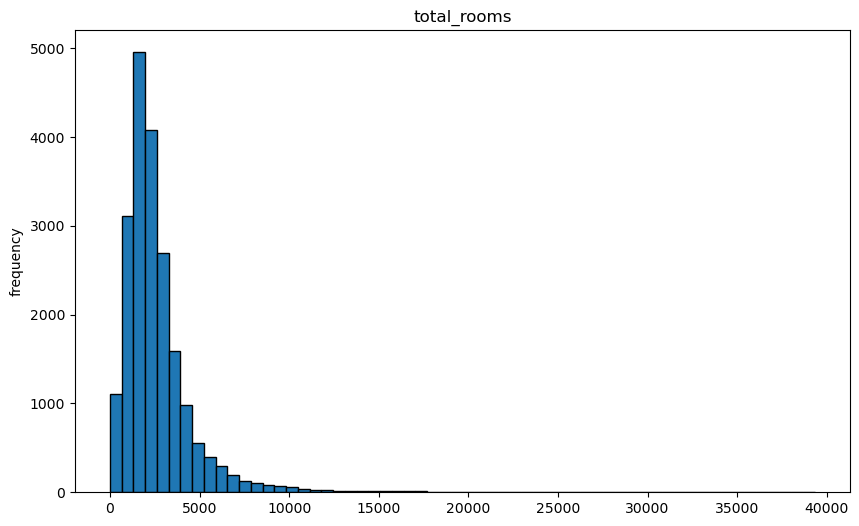

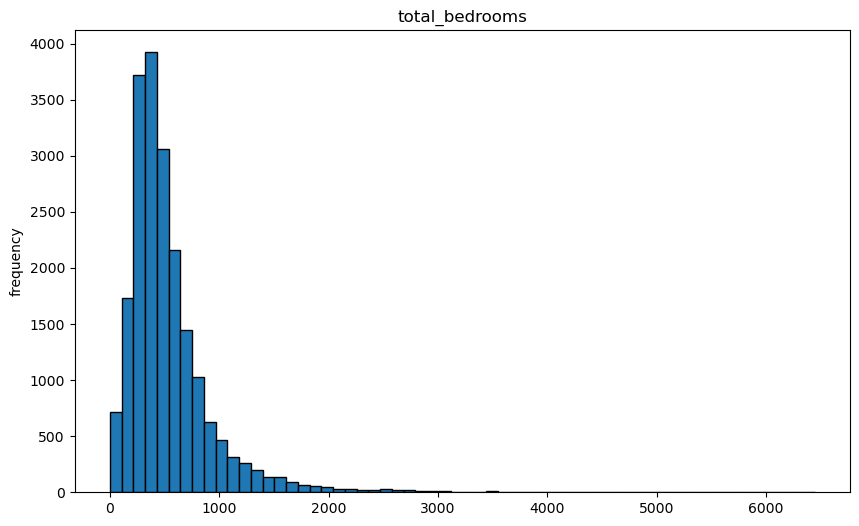

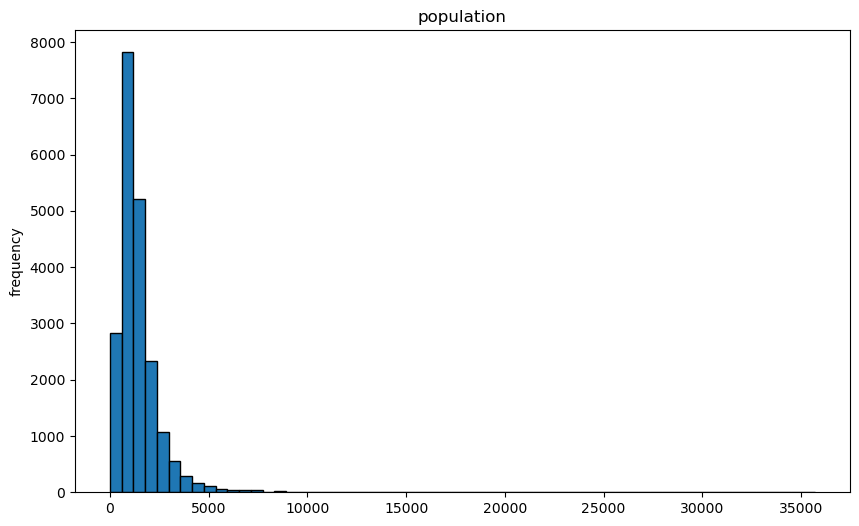

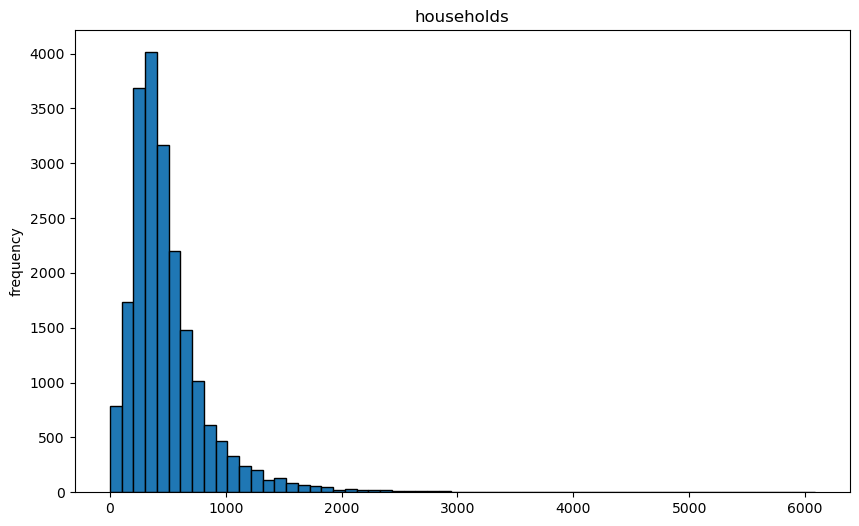

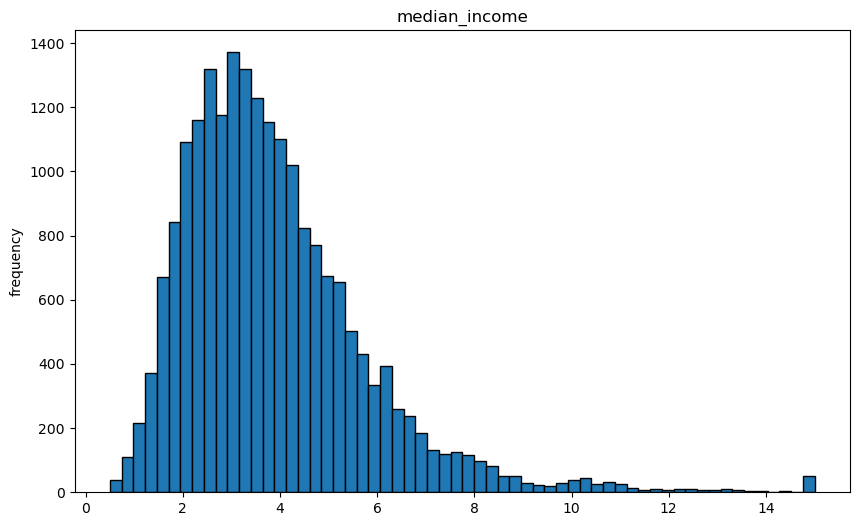

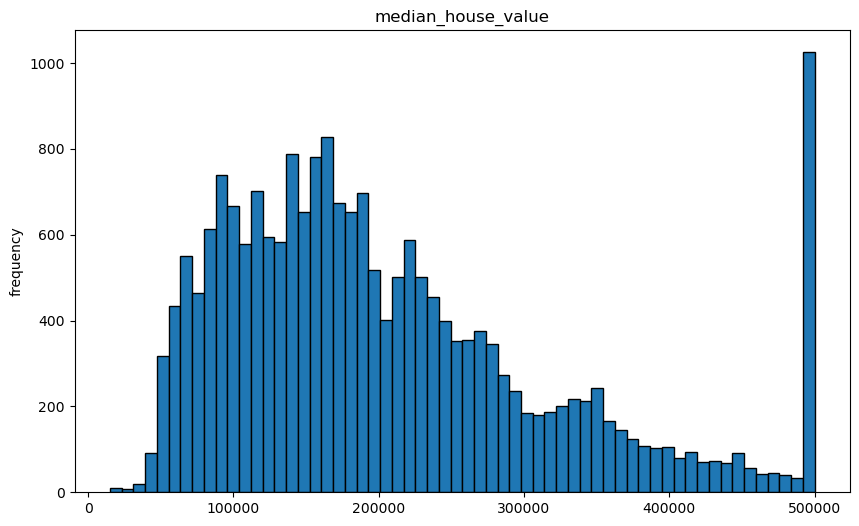

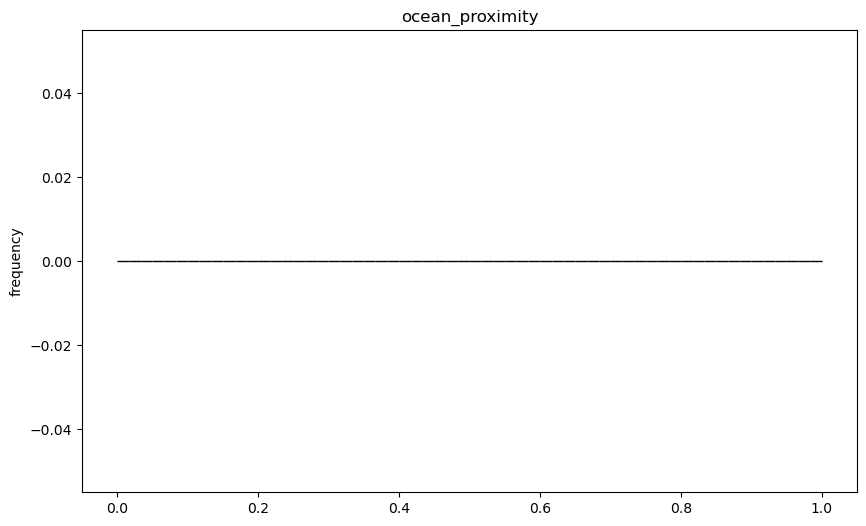

In [40]:
for col in Numerical:
    plt.figure(figsize=(10,6))
    df[col].plot(kind='hist',title=col,bins=60,edgecolor='black')
    plt.ylabel("frequency")
    plt.show()

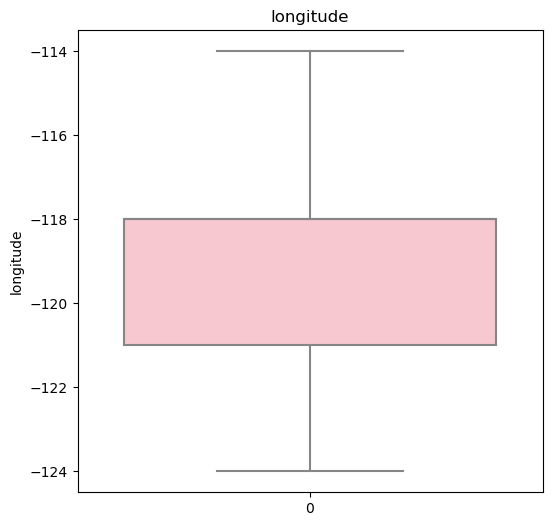

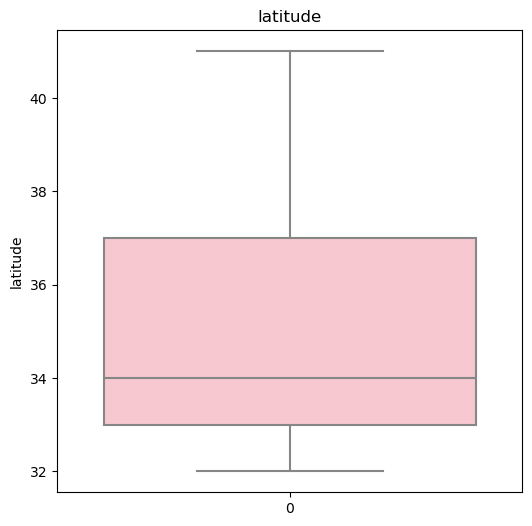

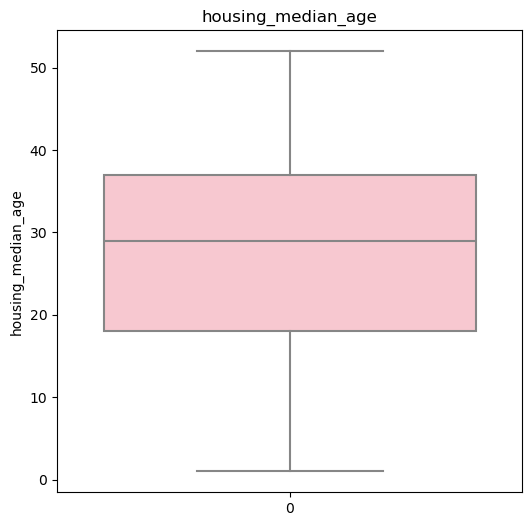

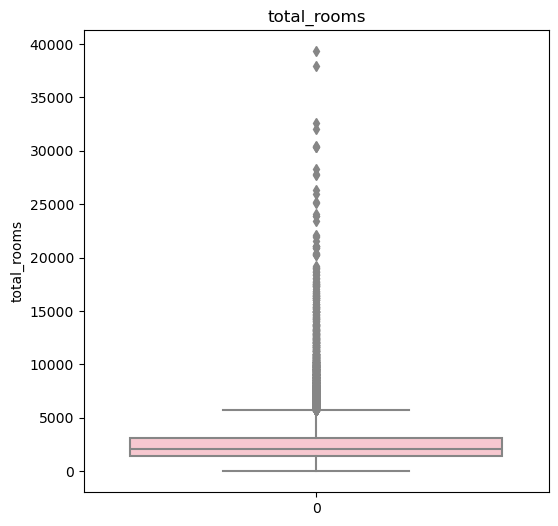

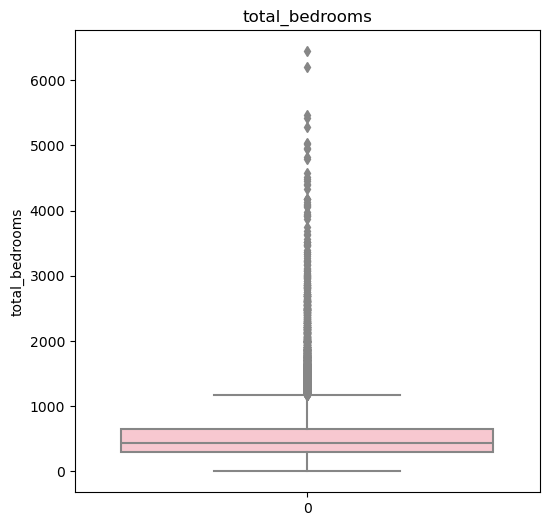

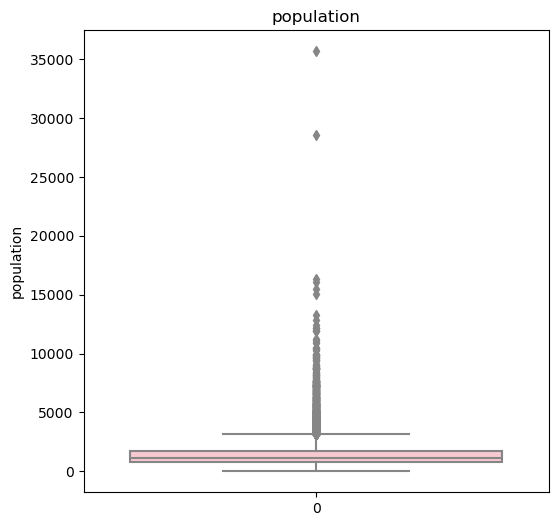

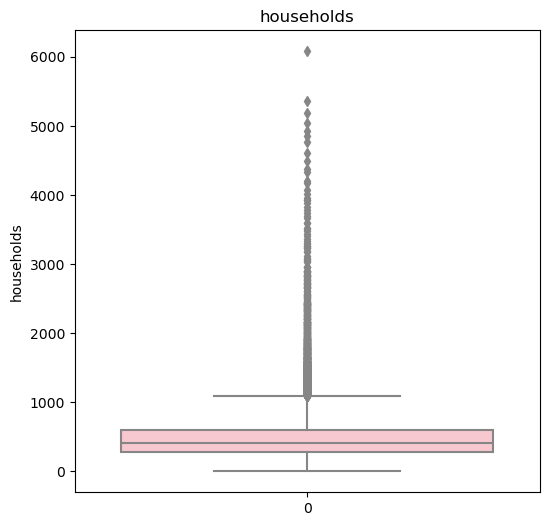

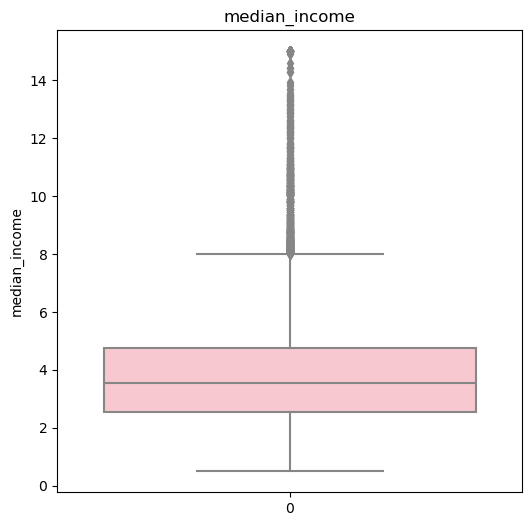

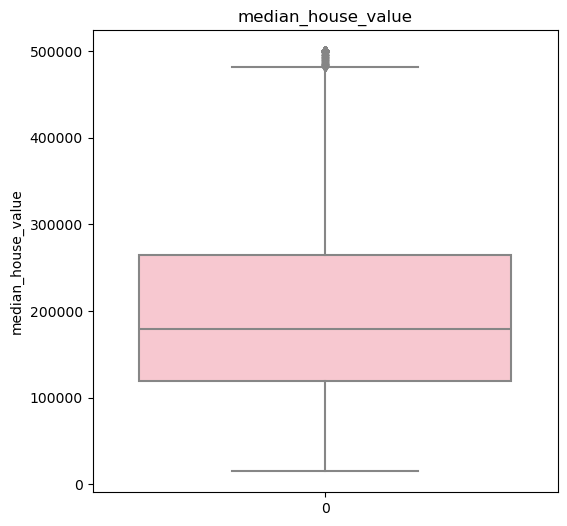

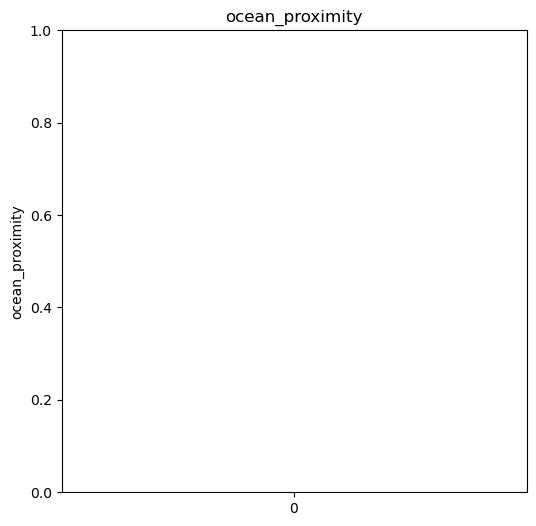

In [42]:
for col in Numerical:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[col],color='pink')
    plt.title(col)
    plt.ylabel(col)
    plt.show()